## Python notebook template block Adventure Work On Zombie enterprise
#### Group 6
#### Team members: 马晨烨、杨潇林、吴菲涵、阮扬程、秦睿思

- Product owner ：马晨烨
- Product manager ：秦睿思
- Business translator ：吴菲涵
- Data scientist ：阮扬程
- Data engineer ：杨潇林

As of now, you created a new notebook for your study with the related contents. However, when working on a project in the real life, all your data and code needs to be in one place for the project. Going forward in the block, all of the code that you generate with regard to the final project about AD should be in this one template. Go back to the code you wrote, evaluate if it is according to [PEP8](https://peps.python.org/pep-0008/) style guide and adjust where necessary. 

This template provides you with a natural flow through the steps of a traditional data science project. Do not forget to clearly add comments to your code. If you would like to add more stucture, add extra mark down blocks to explain what you are doing. 

⚠️Important! Before handing it in, run all of your code. All your cells need to show outputs. This is necessary for grading!⚠️


### Add imports here
When working in .py files, you usually have all your package imports at the top of your code. This makes it easy to get a good overview of the packages that you are using and importing. As of now, we are working in .ipynb, but it is good practice to already start implementing these structures. Add all the imports that you use in all of your code in the code block below. In this way, you do not need to add it in every cell.

In [1]:
# Add your package imports here
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve


### Load the data

After your package imports, you usually load your data. This is what you will be working with and what your code will be based on.

In [2]:

# 读取Excel文件并显示前几行数据
df1 = pd.read_csv('E:/STUDY/Second/Second Down/ML/code2/dataset/base.csv', encoding='GBK') 
df2 = pd.read_csv('E:/STUDY/Second/Second Down/ML/code2/dataset/knowledge.csv', encoding='GBK')
df3 = pd.read_csv('E:/STUDY/Second/Second Down/ML/code2/dataset/money.csv', encoding='GBK')
df4 = pd.read_csv('E:/STUDY/Second/Second Down/ML/code2/dataset/year_report.csv', encoding='GBK')
# 合并数据集
df_merge1 = pd.merge(df1, df2, on='ID')
df_merge2 = pd.merge(df3, df4, on='ID')
df = pd.merge(df_merge1, df_merge2, on='ID')
df.head(2)



,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人ID,控制人持股比例,flag,...,year_y,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
0,1500001,2010.0,6680.0,商业服务业,山东,股份有限公司,自然人,1.0,0.89,1.0,...,2015.0,939.0,33400.0,13360.0,150300.0,120240.0,30060.0,-15030.0,0.0,20040.0
1,1500001,2010.0,6680.0,商业服务业,山东,股份有限公司,自然人,1.0,0.89,1.0,...,2016.0,977.0,200400.0,96860.0,280560.0,168336.0,112224.0,-28056.0,0.0,103540.0


## Data Management and Understanding

### Data Cleansing
In the following section plug in all of your relevant python codes and explanations related to data cleansing. 

- by 杨潇林

In [3]:
df.dropna(inplace=True)  
numeric_columns = ['从业人数', '资产总额', '负债总额', '营业总收入', '主营业务收入', '利润总额', '净利润', '纳税总额', '所有者权益合计'] 
for col in numeric_columns: 
  df[col] = pd.to_numeric(df[col], errors='coerce') # 将无法转换的设置为NaN  
df.dropna(inplace=True)  
dfyear = df[df['从业人数'] >= 0]  
dfyear = dfyear [dfyear ['营业总收入'] >= dfyear ['主营业务收入']] 


df['注册时间'] = pd.to_datetime(df['注册时间'], errors='coerce') # errors='coerce' 会将无法转换的日期设置为NaT 
df['注册资本'] = df['注册资本'].astype(float)   
text_columns = df.select_dtypes(include=['object']).columns 
df[text_columns] = df[text_columns].apply(lambda x: x.str.lower() if pd.api.types.is_string_dtype(x) else x)  
exclude_columns = ['ID', '控制人ID'] 
df[text_columns.difference(exclude_columns)] = df[text_columns.difference(exclude_columns)].apply(lambda x: x.str.lower())  
df.dropna(subset=['注册资本', '控制人持股比例','注册资本','行业','区域','企业类型','控制人类型','控制人ID','控制人持股比例','flag'], inplace=True)  
  
df['ID'] = df['ID'].astype(int)  
df[['专利', '商标', '著作权']] =df[['专利', '商标', '著作权']].astype(int) 
dfyear.dropna(inplace=True) 
 
df.dropna(inplace=True) 
df[['债权融资额度', '债权融资成本', '股权融资额度', '股权融资成本', 
  '内部融资和贸易融资额度', '内部融资和贸易融资成本', 
  '项目融资和政策融资额度', '项目融资和政策融资成本']] = df[ 
  ['债权融资额度', '债权融资成本', '股权融资额度', '股权融资成本', 
  '内部融资和贸易融资额度', '内部融资和贸易融资成本', 
  '项目融资和政策融资额度', '项目融资和政策融资成本']].astype(float)


### Exploratory Data Analysis

Include all exploratory Data Analysis questions you studied in this section. 

- by 马晨烨、杨潇林、秦睿思

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203887 entries, 0 to 277946
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           203887 non-null  int32         
 1   注册时间         203887 non-null  datetime64[ns]
 2   注册资本         203887 non-null  float64       
 3   行业           203887 non-null  object        
 4   区域           203887 non-null  object        
 5   企业类型         203887 non-null  object        
 6   控制人类型        203887 non-null  object        
 7   控制人ID        203887 non-null  float64       
 8   控制人持股比例      203887 non-null  float64       
 9   flag         203887 non-null  float64       
 10  专利           203887 non-null  int32         
 11  商标           203887 non-null  int32         
 12  著作权          203887 non-null  int32         
 13  year_x       203887 non-null  float64       
 14  债权融资额度       203887 non-null  float64       
 15  债权融资成本       203887 non-null  float64  

C:\Windows\Temp\ipykernel_24464\3725692750.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mean_values = df[['注册资本', '控制人持股比例','债权融资额度', '债权融资成本', '股权融资额度', '股权融资成本', '内部融资和贸易融资额度', '内部融资和贸易融资成本', '纳税总额', '所有者权益合计']].applymap(lambda x: np.nan if x == 0 else x).mean()
C:\Windows\Temp\ipykernel_24464\3725692750.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  median_values = df[['注册资本', '控制人持股比例','债权融资额度', '债权融资成本', '股权融资额度', '股权融资成本', '内部融资和贸易融资额度', '内部融资和贸易融资成本', '纳税总额', '所有者权益合计']].applymap(lambda x: np.nan if x == 0 else x).median()
C:\Windows\Temp\ipykernel_24464\3725692750.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  std_deviation = df[['注册资本', '控制人持股比例', '债权融资额度', '债权融资成本', '股权融资额度', '股权融资成本', '内部融资和贸易融资额度', '内部融资和贸易融资成本', '纳税总额', '所有者权益合计']].applymap(lambda x: np.nan if x == 0 else x).std()


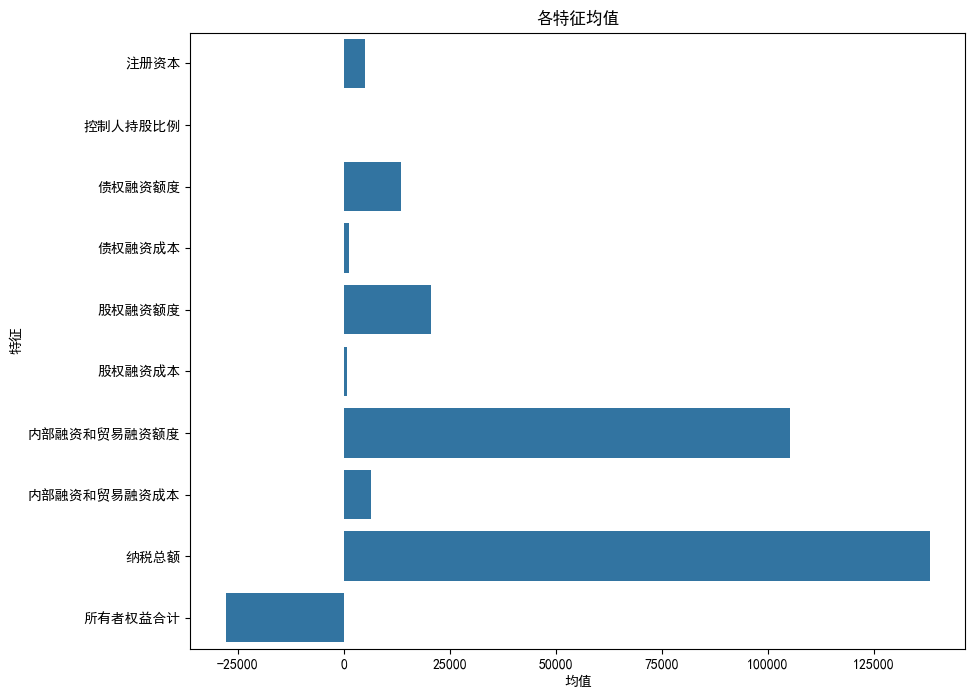

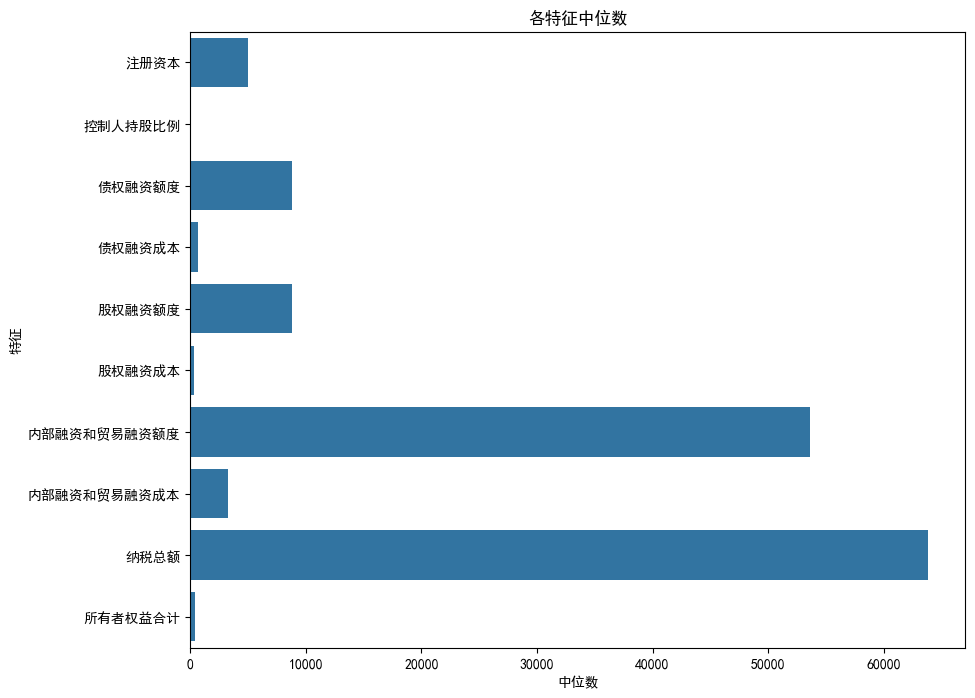

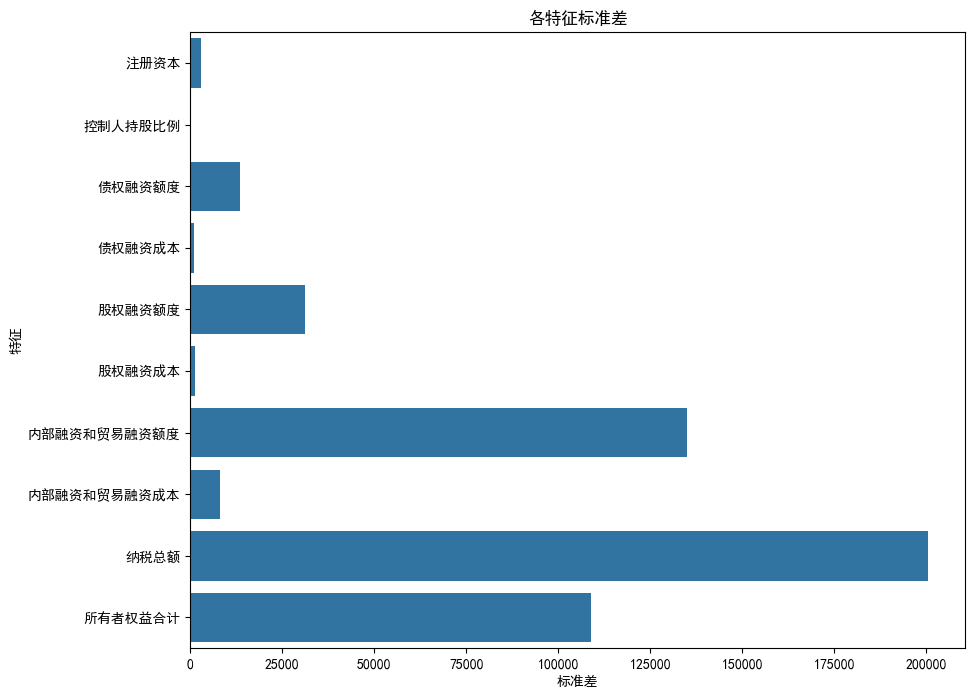

In [5]:
# 计算均值
mean_values = df[['注册资本', '控制人持股比例','债权融资额度', '债权融资成本', '股权融资额度', '股权融资成本', '内部融资和贸易融资额度', '内部融资和贸易融资成本', '纳税总额', '所有者权益合计']].applymap(lambda x: np.nan if x == 0 else x).mean()

# 计算中位数
median_values = df[['注册资本', '控制人持股比例','债权融资额度', '债权融资成本', '股权融资额度', '股权融资成本', '内部融资和贸易融资额度', '内部融资和贸易融资成本', '纳税总额', '所有者权益合计']].applymap(lambda x: np.nan if x == 0 else x).median()

# 计算标准差
std_deviation = df[['注册资本', '控制人持股比例', '债权融资额度', '债权融资成本', '股权融资额度', '股权融资成本', '内部融资和贸易融资额度', '内部融资和贸易融资成本', '纳税总额', '所有者权益合计']].applymap(lambda x: np.nan if x == 0 else x).std()

# 设置matplotlib的字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 'SimHei' 是一个常见的支持中文的字体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号


# 数据准备
columns = ['注册资本', '控制人持股比例', '债权融资额度', '债权融资成本', '股权融资额度', '股权融资成本', '内部融资和贸易融资额度', '内部融资和贸易融资成本', '纳税总额', '所有者权益合计']
stats_data = pd.DataFrame({
    '均值': mean_values,
    '中位数': median_values,
    '标准差': std_deviation
})

# 绘制均值图表
plt.figure(figsize=(10, 8))
sns.barplot(x=stats_data['均值'], y=columns)
plt.title('各特征均值')
plt.xlabel('均值')
plt.ylabel('特征')
plt.show()

# 绘制中位数图表
plt.figure(figsize=(10, 8))
sns.barplot(x=stats_data['中位数'], y=columns)
plt.title('各特征中位数')
plt.xlabel('中位数')
plt.ylabel('特征')
plt.show()

# 绘制标准差图表
plt.figure(figsize=(10, 8))
sns.barplot(x=stats_data['标准差'], y=columns)
plt.title('各特征标准差')
plt.xlabel('标准差')
plt.ylabel('特征')
plt.show()


#### Correlation Analysis and Feature Selection

- by 马晨烨、阮扬程

                 注册资本     控制人ID   控制人持股比例      flag    year_x    债权融资额度  \
注册资本         1.000000  0.004652 -0.001549 -0.003276 -0.000539  0.053957   
控制人ID        0.004652  1.000000  0.005927 -0.210664 -0.000961  0.001947   
控制人持股比例     -0.001549  0.005927  1.000000 -0.002919 -0.001927 -0.003833   
flag        -0.003276 -0.210664 -0.002919  1.000000  0.000638 -0.003849   
year_x      -0.000539 -0.000961 -0.001927  0.000638  1.000000  0.011777   
债权融资额度       0.053957  0.001947 -0.003833 -0.003849  0.011777  1.000000   
债权融资成本       0.053957  0.001947 -0.003833 -0.003849  0.011777  1.000000   
股权融资额度       0.037972 -0.002447  0.000461 -0.005545  0.007289 -0.321820   
股权融资成本       0.037972 -0.002447  0.000461 -0.005545  0.007289 -0.321820   
内部融资和贸易融资额度  0.044944 -0.001254 -0.005403 -0.000553  0.007670 -0.323654   
内部融资和贸易融资成本  0.044944 -0.001254 -0.005403 -0.000553  0.007670 -0.323654   
项目融资和政策融资额度  0.045827  0.003285  0.007316  0.006387  0.002911 -0.325360   
项目融资和政策融资成本  0.045827  0.

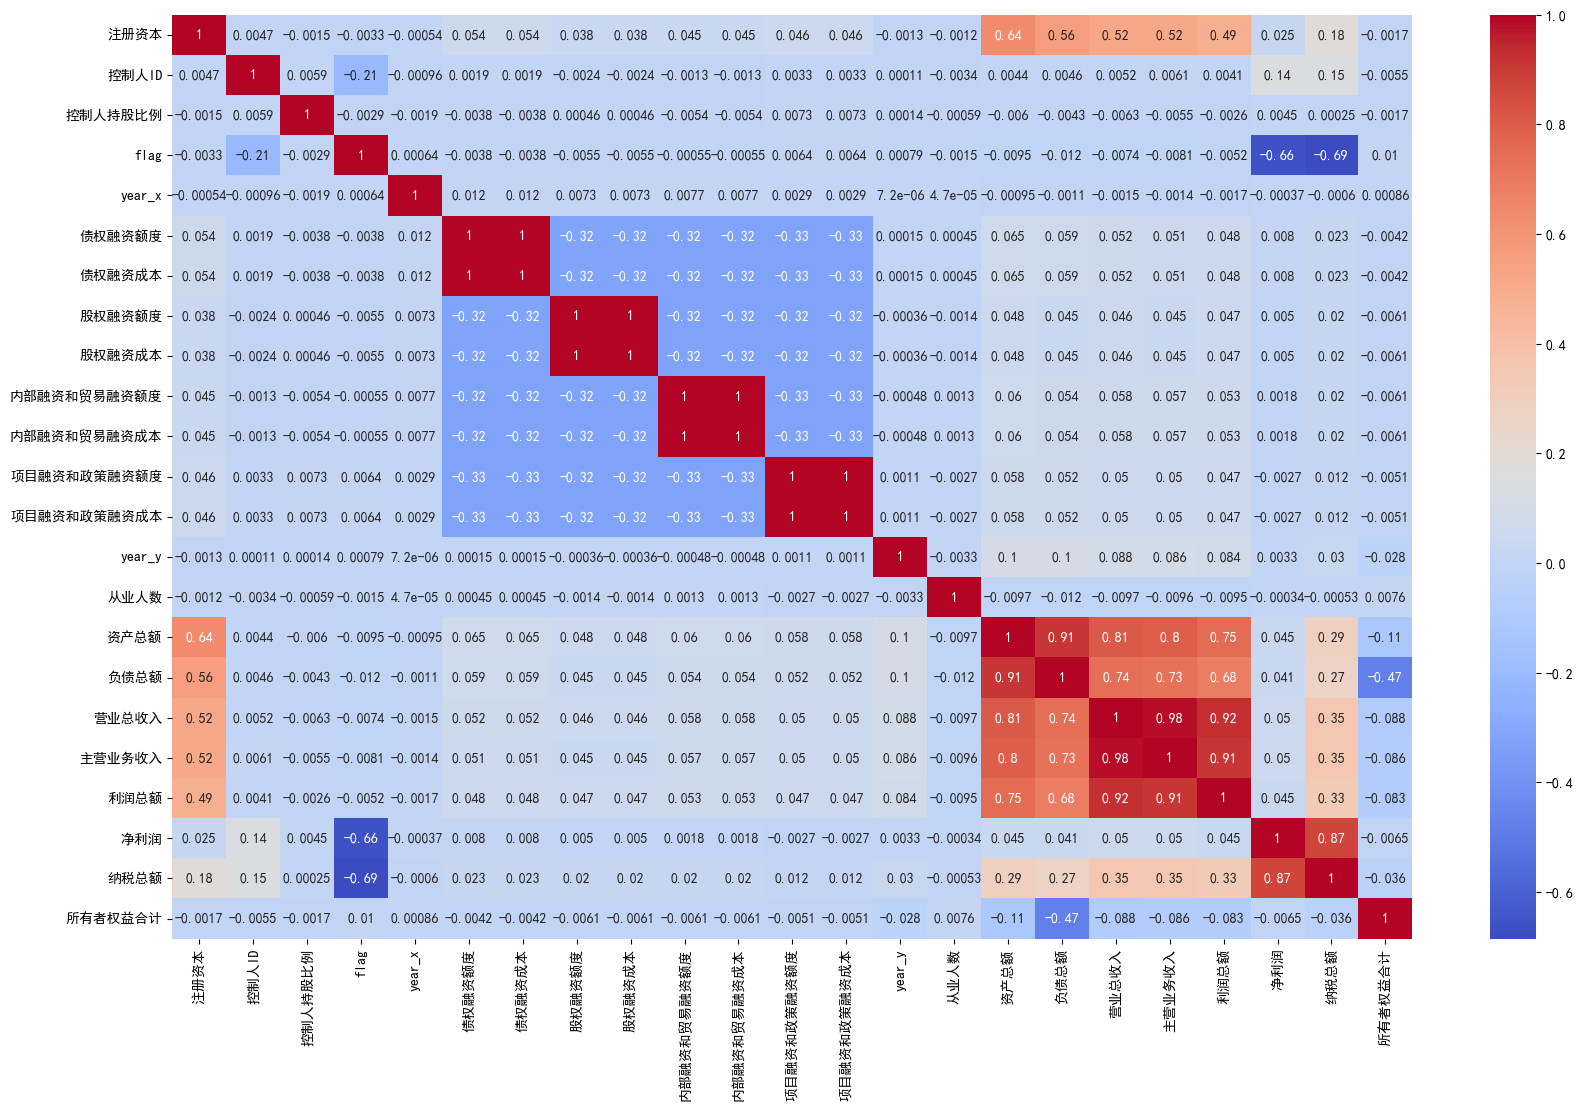

In [6]:
# 设置matplotlib支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文显示字体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号


numeric_data = df.select_dtypes(include=['int64', 'float64'])

# 计算Spearman相关系数
spearman_corr = numeric_data.corr(method='spearman')
print(spearman_corr)

# 绘制热图
plt.figure(figsize=(20, 12))  # 可以调整图形的大小以更好地展示数据
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')

# 显示热图
plt.show()

### 与flag最相关的6个特征变量
- 纳税总额
- 净利润
- 资产总额
- 营业总收入
- 项目融资和政策融资成本
- 项目融资和政策融资额度

所以选择这6个变量为特征变量

## Machine Learning

### Identifying basic Machine Learning applications.
In the following subsection, show your understanding of each of the listed Machine Learning algorithms. Excecute these algorithms on the adventure dataset.

❗Remember! All your package imports should be on top of this notebook.

#### Simple machine learning modelling pipeline

In [7]:
# Enter your code here for a simple machine learning modelling pipeline
# 特征选择
X = df[['净利润','纳税总额','营业总收入','资产总额','项目融资和政策融资额度','项目融资和政策融资成本']]
y = df['flag']

# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### KNN

- by 马晨烨、秦睿思、杨潇林

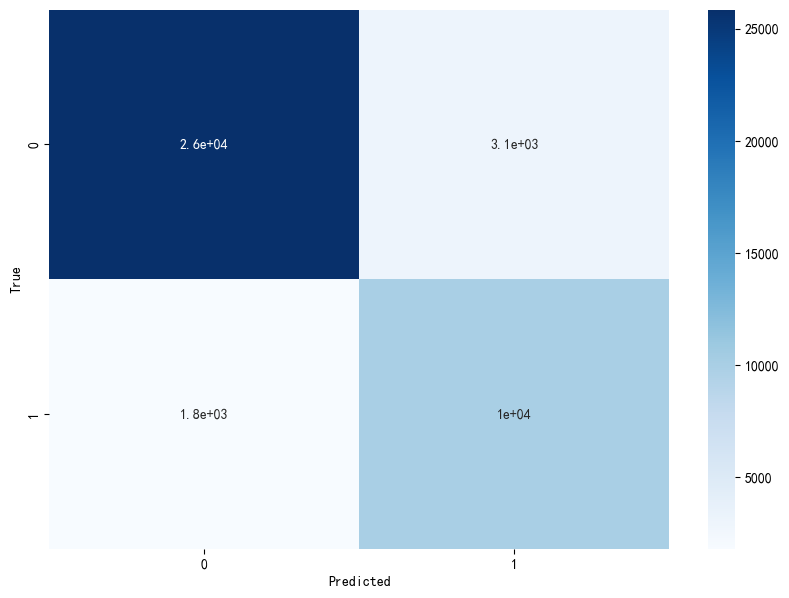

准确率: 0.8805238118593359
分类报告:
               precision    recall  f1-score   support

         0.0       0.93      0.89      0.91     28894
         1.0       0.77      0.85      0.81     11884

    accuracy                           0.88     40778
   macro avg       0.85      0.87      0.86     40778
weighted avg       0.89      0.88      0.88     40778



In [8]:
# 创建KNN模型实例

knn = KNeighborsClassifier(n_neighbors=10) 

# 训练模型
knn.fit(X_train, y_train)

# 对测试集进行预测
y_pred = knn.predict(X_test)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)

# 绘制热图
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(f"准确率: {accuracy}")
print("分类报告:\n", classification_report(y_test, y_pred))


### Logistic Regression

- by 马晨烨、阮扬程

Intercept: [0.95955232]
Coefficients: [[-3.41949875e-01 -4.49503027e-01 -3.41949867e-02 -1.00090461e-07
   5.86320109e-06  3.51792072e-07]]


C:\Windows\Temp\ipykernel_24464\2269559101.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


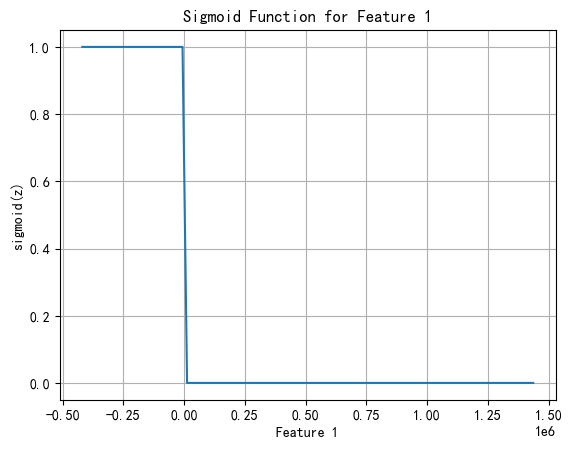

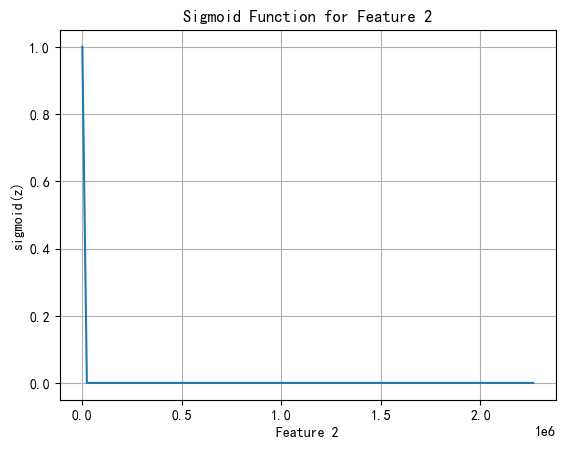

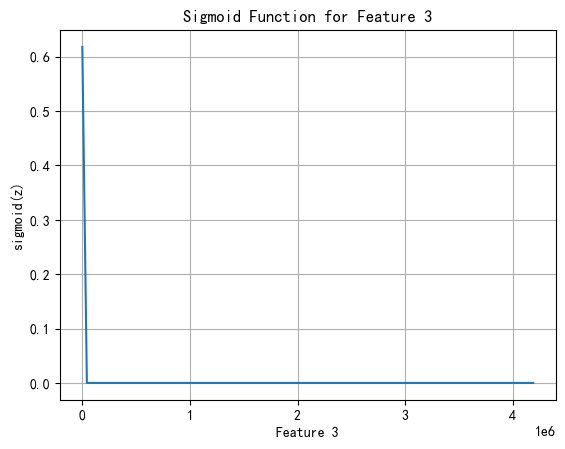

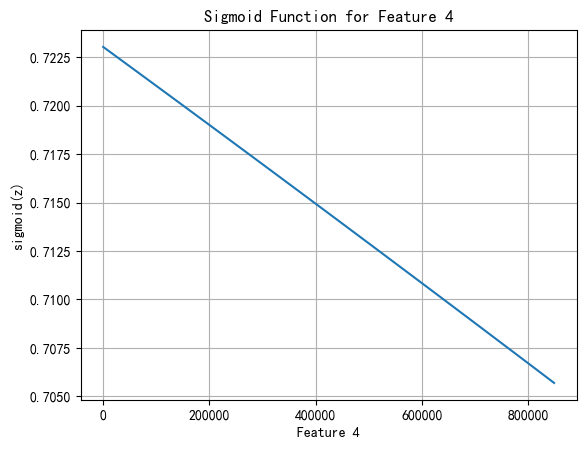

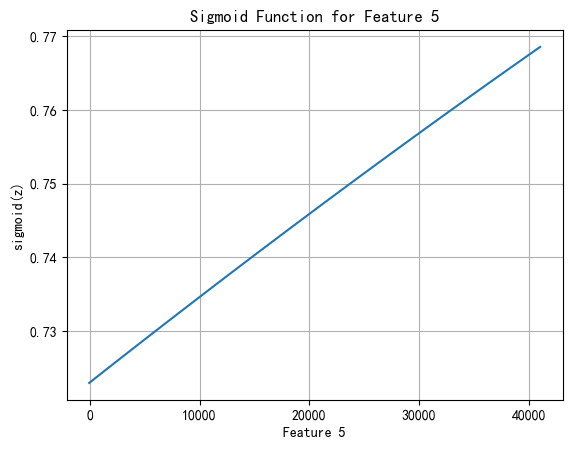

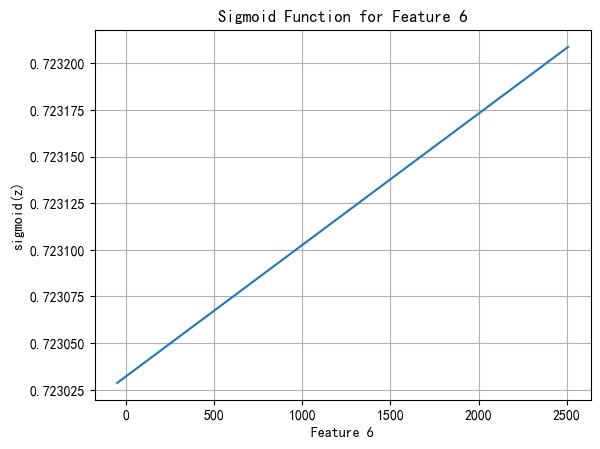

Accuracy: 0.8870224140467899
分类报告:
               precision    recall  f1-score   support

         0.0       1.00      0.84      0.91     28894
         1.0       0.72      1.00      0.84     11884

    accuracy                           0.89     40778
   macro avg       0.86      0.92      0.88     40778
weighted avg       0.92      0.89      0.89     40778



In [9]:
# 创建sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 创建逻辑回归模型实例
log_reg = LogisticRegression()

# 训练模型
log_reg.fit(X_train, y_train)

# 对测试集进行预测
y_pred = log_reg.predict(X_test)

# 打印模型的系数和截距
print("Intercept:", log_reg.intercept_)
print("Coefficients:", log_reg.coef_)

# 绘制所有特征的sigmoid曲线
for i in range(X.shape[1]):
    x_values = np.linspace(X.iloc[:, i].min() - 50, X.iloc[:, i].max() + 50, 100)
    z = log_reg.intercept_ + log_reg.coef_[0][i] * x_values
    sigmoid_values = sigmoid(z)
    
    plt.plot(x_values, sigmoid_values)
    plt.title(f'Sigmoid Function for Feature {i+1}')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('sigmoid(z)')
    plt.grid(True)
    plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("分类报告:\n", classification_report(y_test, y_pred))


### LDA

- by 吴菲涵、马晨烨、杨潇林

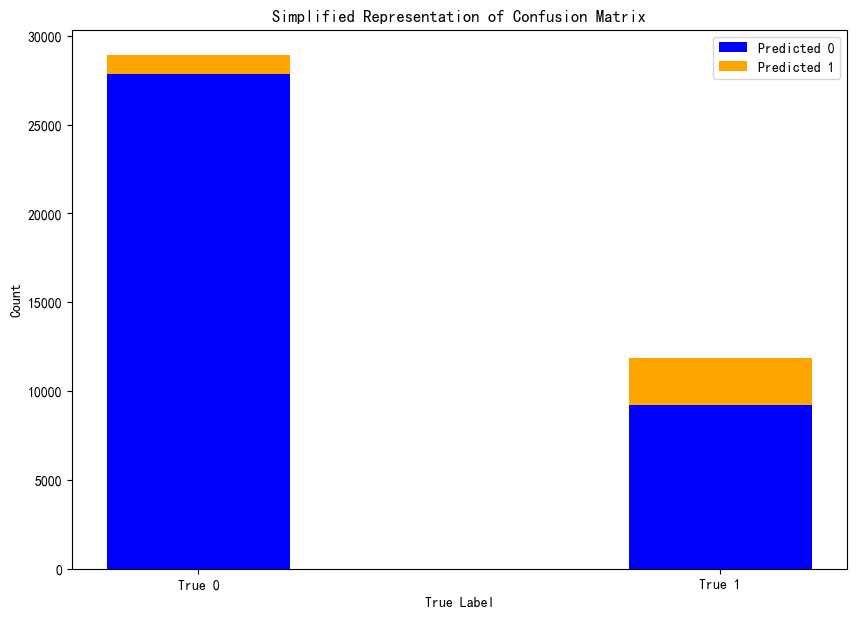

Accuracy: 0.7472902055029673
分类报告:
               precision    recall  f1-score   support

         0.0       0.75      0.96      0.84     28894
         1.0       0.71      0.22      0.34     11884

    accuracy                           0.75     40778
   macro avg       0.73      0.59      0.59     40778
weighted avg       0.74      0.75      0.70     40778



In [10]:
# 创建LDA实例并拟合数据 
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train) 
 
# 对训练集和测试集进行变换 
X_train_lda = lda.transform(X_train) 
X_test_lda = lda.transform(X_test) 
 
# 预测测试集 
y_pred = lda.predict(X_test) 
 
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 这里我们仅展示真正标签为0和1的预测分布 
categories = ['True 0', 'True 1'] 
predicted_0 = [cm[0, 0], cm[1, 0]] # 预测为0的，其中真正标签是0和1的 
predicted_1 = [cm[0, 1], cm[1, 1]] # 预测为1的，其中真正标签是0和1的 
 
plt.figure(figsize=(10, 7)) 
index = np.arange(len(categories)) 
bar_width = 0.35 
 
# 绘制堆叠条形图 
p1 = plt.bar(index, predicted_0, bar_width, label='Predicted 0', color='blue') 
p2 = plt.bar(index, predicted_1, bar_width, bottom=predicted_0, label='Predicted 1', color='orange')
 
plt.xlabel('True Label') 
plt.ylabel('Count') 
plt.xticks(index, categories) 
plt.title('Simplified Representation of Confusion Matrix') 
plt.legend() 
 
plt.show() 
 
# 打印准确率和分类报告 
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("分类报告:\n", classification_report(y_test, y_pred))

### Random Forest

- by 马晨烨、杨潇林、秦睿思

Accuracy: 0.9456569718966109
分类报告:
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96     28894
         1.0       0.88      0.95      0.91     11884

    accuracy                           0.95     40778
   macro avg       0.93      0.95      0.94     40778
weighted avg       0.95      0.95      0.95     40778



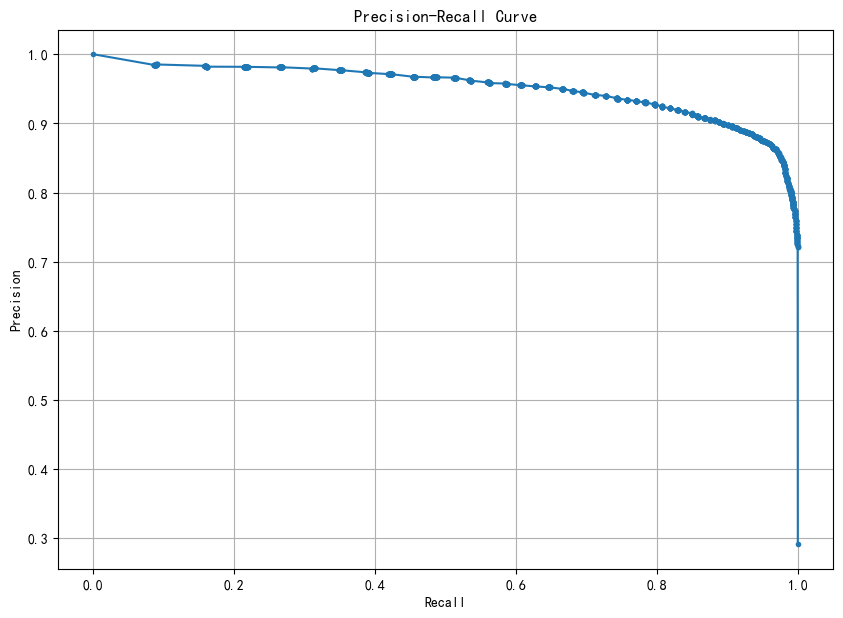

In [11]:
# 标签编码
label_encoder = LabelEncoder()
df['flag'] = label_encoder.fit_transform(df['flag'])

# 创建随机森林模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 训练模型
rf_model.fit(X_train, y_train)

# 预测测试集
y_pred = rf_model.predict(X_test)
y_scores = rf_model.predict_proba(X_test)[:, 1]  # 获取预测概率

# 评估模型

print("Accuracy:", accuracy_score(y_test, y_pred))
print("分类报告:\n", classification_report(y_test, y_pred))

# 计算精准率-召回率曲线
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# 绘制精准率-召回率曲线
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

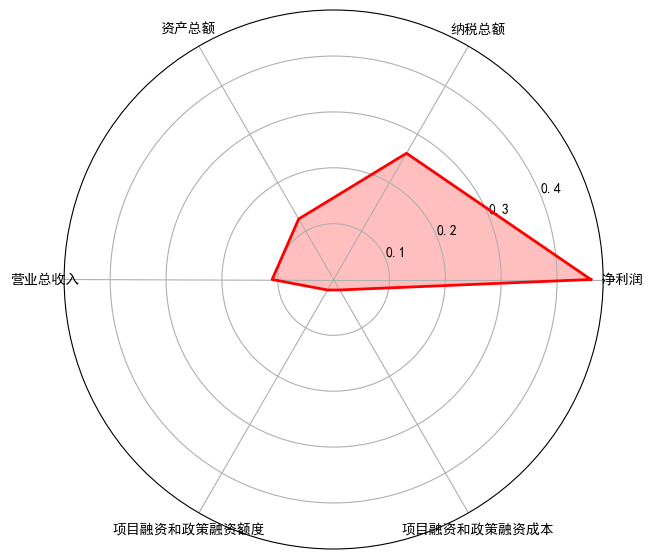

In [12]:
# 提取特征重要性 
importances = rf_model.feature_importances_ 
feature_names = X_test.columns # 假设X_train是一个DataFrame，其列名是特征名 
 
# 对特征重要性进行排序 
indices = np.argsort(importances)[::-1] 
 
# 绘制“雷达图”样式的特征重要性图 
plt.figure(figsize=(10, 7)) 
angles = np.linspace(0, 2 * np.pi, len(indices), endpoint=False).tolist() 
 
# 为了使雷达图闭合，我们需要复制第一个特征的重要性 
values = np.concatenate((importances[indices], [importances[indices[0]]])) 
angles += angles[:1] 
 
# 绘制极坐标图 
ax = plt.subplot(111, polar=True) 
ax.plot(angles, values, color='red', linewidth=2, linestyle='solid') 
ax.fill(angles, values, color='red', alpha=0.25) 
 
# 设置角度标签 
ax.set_thetagrids(np.degrees(angles[:-1]), feature_names[indices]) 
 
plt.show()

### AdaBoost

- by 马晨烨、杨潇林、吴菲涵

Accuracy: 0.8870224140467899
分类报告:
               precision    recall  f1-score   support

         0.0       1.00      0.84      0.91     28894
         1.0       0.72      1.00      0.84     11884

    accuracy                           0.89     40778
   macro avg       0.86      0.92      0.88     40778
weighted avg       0.92      0.89      0.89     40778



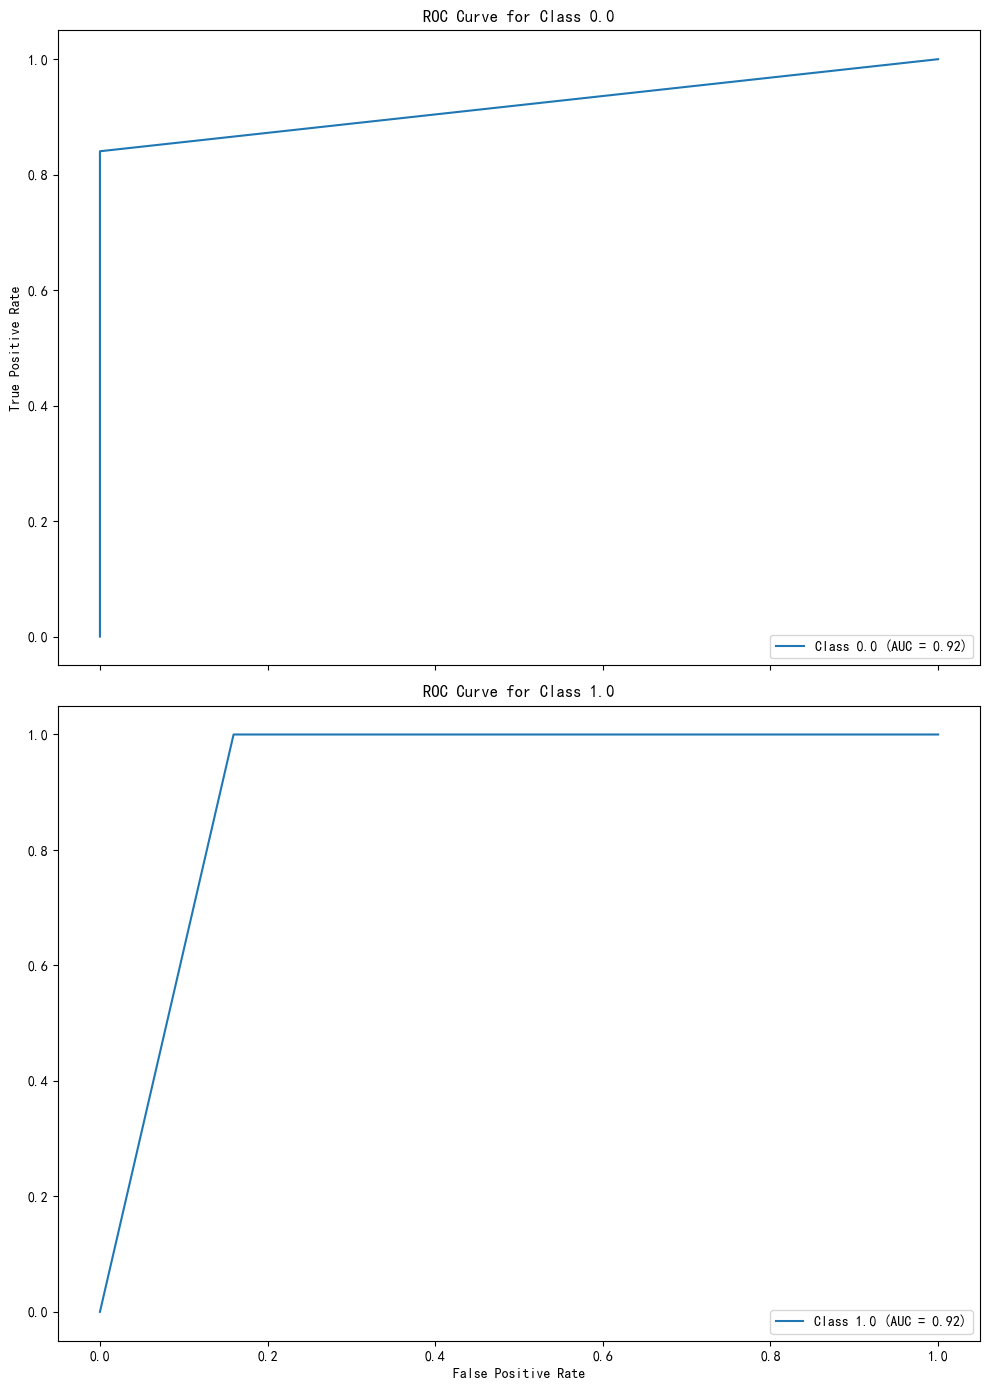

In [13]:
ada = AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42) 
 
# 拟合模型 
ada.fit(X_train, y_train) 
 
# 预测测试集 
y_pred = ada.predict(X_test) 
 
# 评估模型 
accuracy = accuracy_score(y_test, y_pred) 
 
# 打印准确率和分类报告 
print(f'Accuracy: {accuracy}') 
print("分类报告:\n", classification_report(y_test, y_pred)) 
 
# 计算并绘制每个类别的ROC曲线 
n_classes = len(np.unique(y_test)) 
if n_classes == 1: 
  print("Warning: Only one class in the test set. ROC curve will not be meaningful.") 
else: 
  fig, axes = plt.subplots(n_classes, 1, figsize=(10, 7 * n_classes), sharex=True) 
 
  # 如果只有一个类别，我们需要将axes转换为列表 
  if n_classes == 1: 
    axes = [axes] 
 
  for i, cls in enumerate(np.unique(y_test)): 
    y_test_binary = (y_test == cls).astype(int) 
    y_scores = ada.predict_proba(X_test)[:, i] 
    fpr, tpr, _ = roc_curve(y_test_binary, y_scores) 
    roc_auc = auc(fpr, tpr) 
    axes[i].plot(fpr, tpr, label=f'Class {cls} (AUC = {roc_auc:.2f})') 
    axes[i].legend(loc="lower right") 
    axes[i].set_title(f'ROC Curve for Class {cls}') 
 
  # 只在最底下的子图上设置x轴标签 
  if n_classes > 1: 
    axes[-1].set_xlabel('False Positive Rate') 
  # 只在最上面的子图上设置y轴标签 
  axes[0].set_ylabel('True Positive Rate') 
 
  # 调整子图间距 
  plt.tight_layout() 
  plt.show() 

### Choose the best model

In the following subsection reflect on the most appropriate machine learning model. 

- by 马晨烨、秦睿思

In [14]:
# Add your code here for comparing your models. Describe in the markdown below why the model you chose is the best model.
# 定义模型
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_model,
    "LDA": lda,
    "AdaBoost": ada,
    "KNN": knn
}

# 评估模型
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} Accuracy: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")


c:\Users\马晨烨\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\马晨烨\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Logistic Regression Accuracy: 0.89 (+/- 0.00)
Random Forest Accuracy: 0.85 (+/- 0.00)
LDA Accuracy: 0.75 (+/- 0.00)
AdaBoost Accuracy: 0.89 (+/- 0.00)
KNN Accuracy: 0.84 (+/- 0.00)


- Choose the Logistic Regression model,because it is more accurate and it is the fastest